![](http://osloyi5le.bkt.clouddn.com/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E5%B7%A5%E7%A8%8B%E5%B8%88banner.png)

# SVM支持向量机

我们在这里介绍一下监督学习当中的经典模型SVM(支持向量机)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## 最大间隔分类

实际上SVM可以用于分类和回归，我们以分类为例，来介绍一下，一个简单数据集上，最大间隔与SVM的诞生。

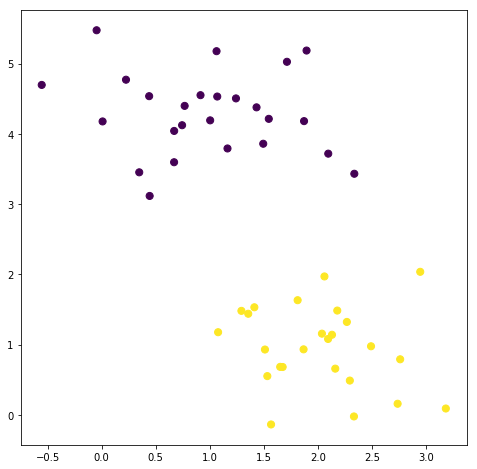

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50);

我们要完成一个分类问题，需要在2种不同的样本点之间产出一条“决策边界”，下图显示了3条不同的可选决策边界。

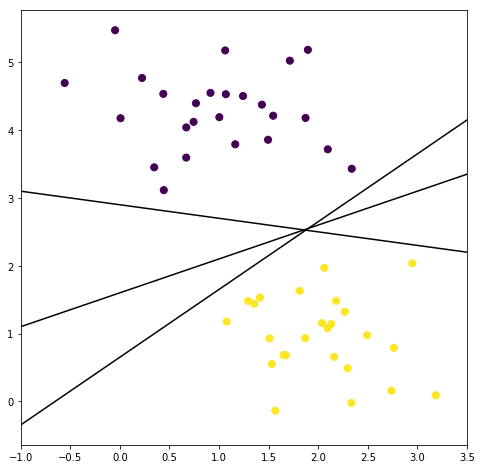

In [3]:
xfit = np.linspace(-1, 3.5)
plt.figure(figsize=(8,8))

plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

那么，哪条决策边界是“最优”的决策边界？我们需要引出“最大间隔”的概念

### 支持向量机与“最大化间隔”

我们希望得到的分类器有着比较好的健壮性/鲁棒性，那么它抗拒噪声点的能力应该是比较强的，由此引出了如下的最大间隔概念。

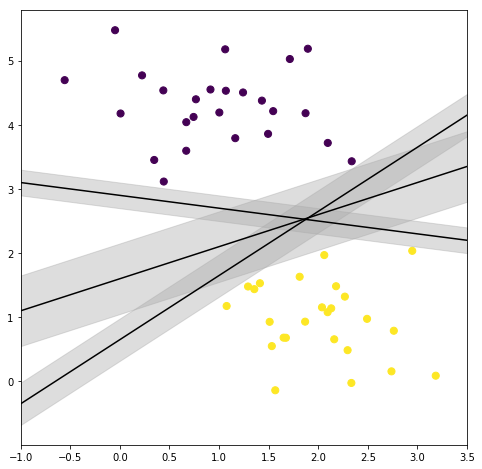

In [4]:
xfit = np.linspace(-1, 3.5)
plt.figure(figsize=(8,8))

plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

我们在SVM中的最初思想，就是找到一个分类器，能得到上图里在中间位置的，能有最大分类间隔的决策边界。

#### 拟合支持向量机

这是一个线性可切分的例子，我们用sklearn中linear kernel的svm来分一下。

In [5]:
from sklearn.svm import SVC # "Support Vector Classifier"
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

为了更好地帮助大家理解，我们来做一个可视化。

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

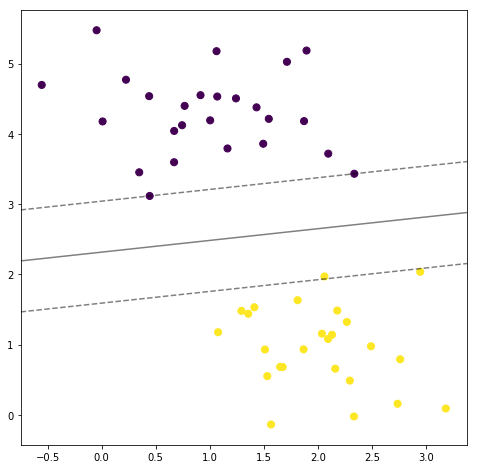

In [8]:
plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plot_svc_decision_function(clf);

注意到上图在虚线上的样本点，我们把它们叫做支持向量，你可以在sklearn的svm模型的``support_vectors_``属性中取到它们。

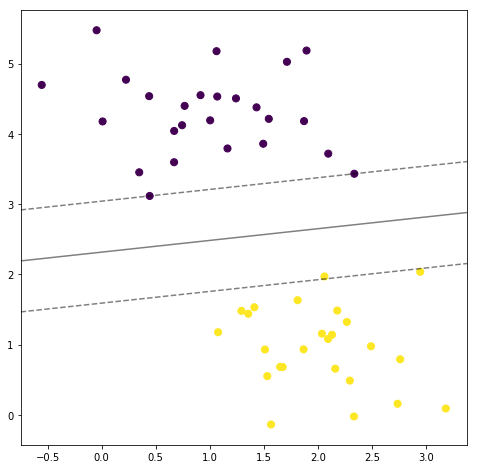

In [9]:
plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');

你可以试试用ipython的动态交互功能去玩一下这个分类器。

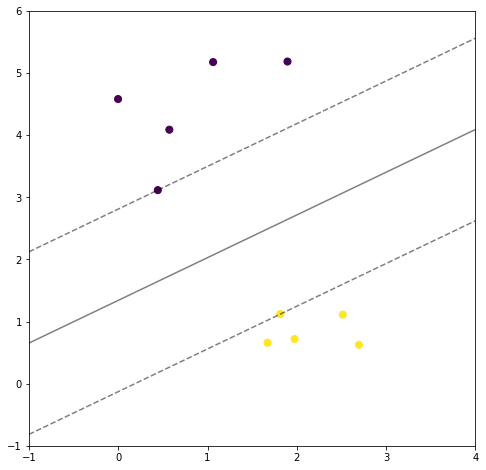

In [10]:
from ipywidgets import interact

def plot_svm(N=10):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    clf = SVC(kernel='linear')
    clf.fit(X, y)
    plt.figure(figsize=(8,8))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
    plt.xlim(-1, 4)
    plt.ylim(-1, 6)
    plot_svc_decision_function(clf, plt.gca())
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=200, facecolors='none')
    
interact(plot_svm, N=[10, 200], kernel='linear');

#### SVM的核函数

核函数是赋予SVM极强的拟合能力(非线性分类能力)的“高级功能”，我们这里来探索一下支持向量机的核函数。

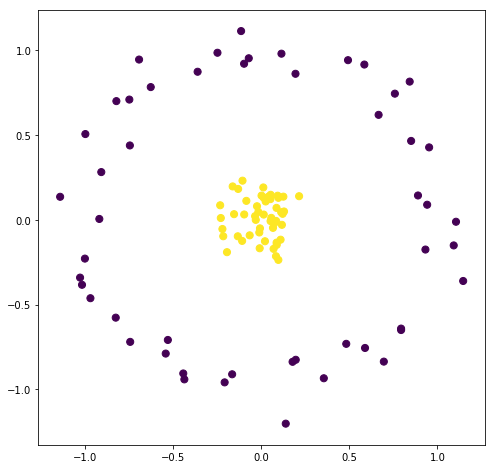

In [11]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)
plt.figure(figsize=(8,8))

plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
# plot_svc_decision_function(clf);

显然上面的2类数据我们是没办法用线性分类器切分开的，那我们给SVM配上一个 径向基函数/高斯核(rbf kernel)

In [12]:
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))

If we plot this along with our data, we can see the effect of it:

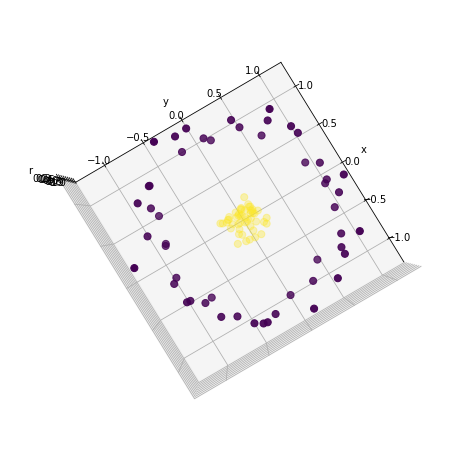

In [13]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30):
    plt.figure(figsize=(8,8))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50)
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180));

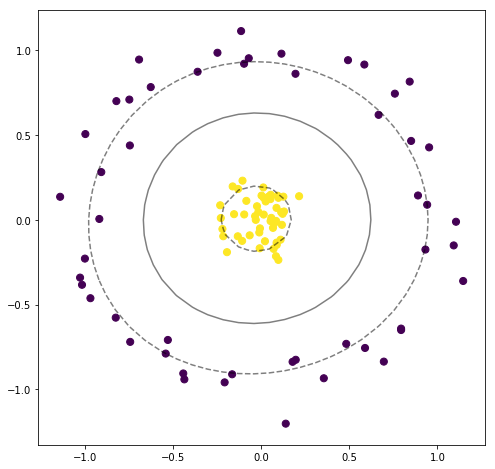

In [14]:
clf = SVC(kernel='rbf')
clf.fit(X, y)

plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plot_svc_decision_function(clf)
